In [ ]:
!kaggle datasets download -d tanlikesmath/diabetic-retinopathy-resized


Dataset URL: https://www.kaggle.com/datasets/tanlikesmath/diabetic-retinopathy-resized
License(s): unknown
100% 7.25G/7.25G [04:40<00:00, 28.1MB/s]
100% 7.25G/7.25G [04:40<00:00, 27.8MB/s]


In [ ]:
!ls
!unzip diabetic-retinopathy-resized.zip
!ls

Streaming output truncated to the last 5000 lines.
  inflating: resized_train_cropped/resized_train_cropped/44260_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44261_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44261_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44262_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44262_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44263_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44263_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44264_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44264_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44265_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44265_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44267_left.jpeg  
  inflating: resized_train_cropped/resized_

        filename  diagnosis
0   10_left.jpeg          0
1  10_right.jpeg          0
2   13_left.jpeg          0
3  13_right.jpeg          0
4   15_left.jpeg          1
Found 28087 validated image filenames belonging to 5 classes.
Found 7021 validated image filenames belonging to 5 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


878/878 ━━━━━━━━━━━━━━━━━━━━ 849s 955ms/step - accuracy: 0.6652 - loss: 5.6592 - val_accuracy: 0.7260 - val_loss: 1.1347 - learning_rate: 0.0010
Epoch 2/10
878/878 ━━━━━━━━━━━━━━━━━━━━ 787s 891ms/step - accuracy: 0.7272 - loss: 1.3027 - val_accuracy: 0.7255 - val_loss: 1.5555 - learning_rate: 0.0010
Epoch 3/10
878/878 ━━━━━━━━━━━━━━━━━━━━ 793s 898ms/step - accuracy: 0.7409 - loss: 0.9768 - val_accuracy: 0.7292 - val_loss: 0.9084 - learning_rate: 0.0010
Epoch 4/10
878/878 ━━━━━━━━━━━━━━━━━━━━ 861s 966ms/step - accuracy: 0.7359 - loss: 0.9130 - val_accuracy: 0.7295 - val_loss: 0.9788 - learning_rate: 0.0010
Epoch 5/10
878/878 ━━━━━━━━━━━━━━━━━━━━ 707s 799ms/step - accuracy: 0.7343 - loss: 0.8831 - val_accuracy: 0.7300 - val_loss: 0.9087 - learning_rate: 0.0010
Epoch 6/10
878/878 ━━━━━━━━━━━━━━━━━━━━ 695s 786ms/step - accuracy: 0.7352 - loss: 0.9454 - val_accuracy: 0.7307 - val_loss: 0.8756 - learning_rate: 0.0010
Epoch 7/10
878/878 ━━━━━━━━━━━━━━━━━━━━ 743s 788ms/step - accuracy: 0.7428 

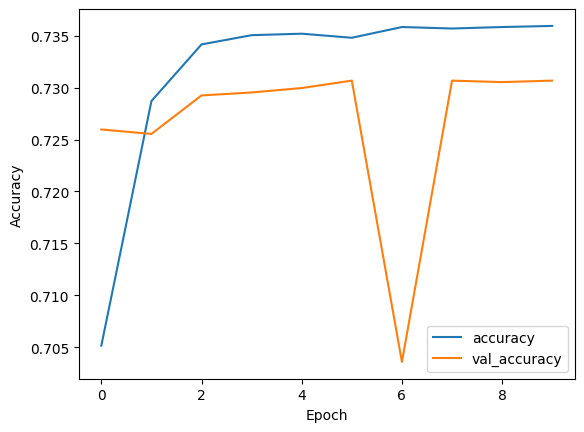

In [ ]:
#V2 model tr
#import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input  # Import Input here
from tensorflow.keras.optimizers import Adam

# Set the paths for the training images and lables
image_folder = '/content/resized_train_cropped/resized_train_cropped'
csv_file = '/content/trainLabels_cropped.csv'

# Load and preprocess the CSV file
df = pd.read_csv(csv_file)
df = df.iloc[:, -2:]  # Keep only the last two columns (filename and diagnosis)!
df.head()
df.columns = ['filename', 'diagnosis']  # Rename columns for clarity
df['filename'] = df['filename'] + '.jpeg'  # Append .jpg to filenames

# Display the first few rows of the dataframe to check it has been properly adapted and sanitised.
print(df.head())

# Create a mapping from diagnosis to numeric labels
label_map = {label: idx for idx, label in enumerate(df['diagnosis'].unique())}
df['label'] = df['diagnosis'].map(label_map)  # Create a new column for numeric labels

# Convert labels to string type
df['label'] = df['label'].astype(str)

# Set parameters for image data generator
img_width, img_height = 224, 224  # Adjust based on your image size
batch_size = 32

# Ensure that filenames are of string type
df['diagnosis'] = df['diagnosis'].astype(str)
df['filename'] = df['filename'].astype(str)

# Create ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2 #use 20% for validation
)


# Create generators for training and validation sets
train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=image_folder,
    x_col='filename',
    y_col='diagnosis',  # Use 'label' for numeric labels (now strings)
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training',
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=image_folder,
    x_col='filename',
    y_col='diagnosis',  # Use 'label' for numeric labels (now strings)
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation',
)

# Build the CNN model
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(Input(shape=(img_width, img_height, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))  # Adjusted Dropout Rate
model.add(Dense(len(label_map), activation='softmax'))


# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-4)
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

#Save the model
model.save('DR_CNN.h5')  # Saves the model in HDF5 format
model.save('DR_CNN.keras')  # Saves the model in Keras format

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()